In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
state0 = xr.open_dataset('/Users/weiyangbao/Desktop/sill12/state_007.nc')
#state0 = xr.open_dataset('/work/oceans/wbao/MITgcm_results/iceplume/sill30/state_004.nc')
state = state0.isel(Y = range(1,10)) # Remove the boundary walls in y direction

In [3]:
Qsg = 700 # subglacial discharge
sill_depth = 12
x_sill = 28
depth = state.Z.data
time = state.T.data / 86400 # Time in days
pt = state.Temp.isel(X = x_sill).data.mean(2) # dims = Time, Z
u0 = state.U.data # dims = T, Z, Y, Xp1
u_ymean = (u0[:, :, :, 1:].mean(2) + u0[:, :, :, :-1].mean(2)) / 2
u = u_ymean[:, :, x_sill]
ls = np.argwhere(u[2,:] == 0)[0][0] # The layer of sill_depth

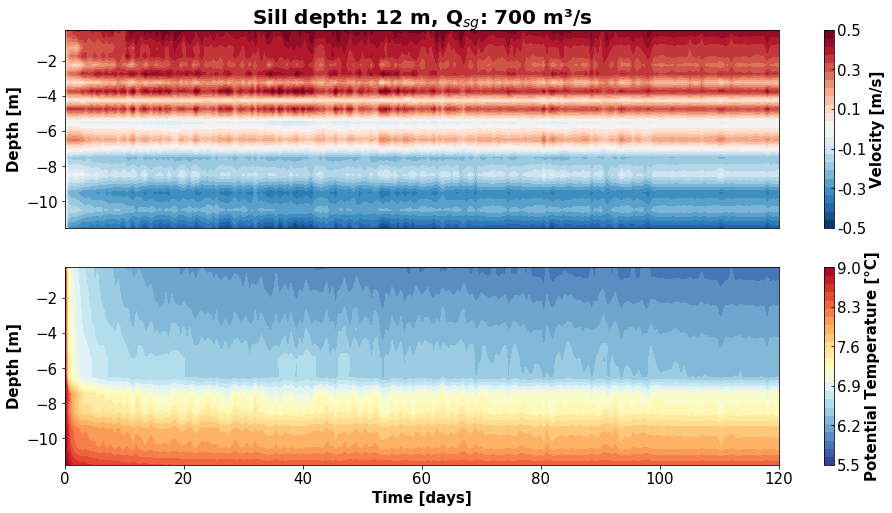

In [8]:
fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/UTcontourf/"
#fig_path = "/home/1959/Jupyter_Figs/sill30/UTcontourf/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
# Make plots
fig = plt.figure(figsize=(16,8))
ct = np.linspace(5.5,9,25) # Contour range for temperature
cv = np.linspace(-0.5,0.5,25) # Contour range for velocity
# Plot velocity contour map
ax1 = fig.add_subplot(211)
plt.contourf(time,depth[:ls],u[:,:ls].T, cv, cmap = 'RdBu_r')
plt.yticks(fontsize = 15)
cbar1 = plt.colorbar(ticks = np.linspace(-0.5,0.5,6), format = '%.1f')
cbar1.ax.tick_params(labelsize = 15, direction = 'in')
cbar1.set_label('Velocity [m/s]', size = 15, weight = 'bold')
#ax1.yaxis.set_ticks_position('left')
plt.title("Sill depth: " + str(sill_depth) + ' m, Q$_{sg}$: ' + str(Qsg) + ' m\u00B3/s', size = 20, weight = 'bold')
ax1.set_ylabel('Depth [m]', size = 15, weight = 'bold')
ax1.axes.get_xaxis().set_visible(False)

# Plot temperature contour map
ax2 = fig.add_subplot(212)
plt.contourf(time,depth[:ls],pt[:,:ls].T, ct, cmap = 'RdYlBu_r')
cbar2 = plt.colorbar(ticks = np.linspace(5.5,9,6), format = '%.1f')
cbar2.ax.tick_params(labelsize = 15, direction = 'in')
cbar2.set_label('Potential Temperature [\N{DEGREE SIGN}C]', size = 15, weight = 'bold')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
ax2.set_xlabel('Time [days]', size = 15, weight = 'bold')
ax2.set_ylabel('Depth [m]', size = 15, weight = 'bold')

fig.savefig(fig_path + 'Qsg' + str(Qsg) + '.png', dpi = 150, bbox_inches='tight')